# Homework 2 Regression Refresher

In class, we considered a very simply algorithm called gradient descent that we used to estimate the parameters of a simple linear model. But we left many considerations open. These include:
- Normalization 
    - We saw that the SSE is a very big number in our example, leading us to choose awkwardly small learning rates. Normaling the error may help us use more reasonably sized learning rates.
- When to stop
    - We can tell the algorithm to stop after a set number of iterations or, something smarter, tell it to stop when it begins to take very small step sizes
- Multiple solutions
    - It should be obvious that gradient descent, as an algorithm, doesn't do much "thinking". 
    - If there are multiple solutions, it will only find one
        

## Problem 1 - Use gradient descent to identify multiple minima

Regression algorithms ultimately search for minima. This can be where an error function is minimized (as we saw in class) or when a polynomial equation is minimized. Using the code from our lecture, adapt the code in order to indentify the roots of the following equation: 

$x^3 - 6x^2 +11x = 6$
  
- Look at homework 1 for how to tackle this problem.
- Since the polynomial will have more than 1 solution, be sure to consider multiple starting guesses. 
- Use the "roots" function from numpy to check your answer. Roots is especially designed for polynomials and should find all roots.

What is your guess for the root of the polynomial?: 0.5
Root is at x = 1.000000


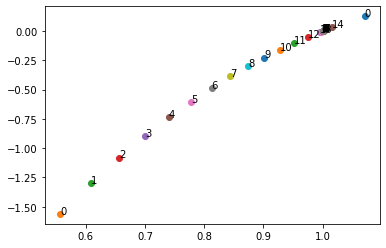

array([3., 2., 1.])

In [6]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

#defining polynomial in a function
def polynomial(x):
    answer = x**3 - 6*(x*x) + 11*x - 6
    return answer

#defining derivative function
def derivative(x):
    deriv = (polynomial(x+0.01)-polynomial(x))/.01
    
    if deriv<0:
        deriv = abs(deriv)
    return deriv

#pre-setting some constants
answer = 0
past_answer = 0
n = 0
rate = 0.1

#asking for user input on a guess
current_x = float(input('What is your guess for the root of the polynomial?: '))

#while-loop to run gradient descent
#NOTE: only works if your guess is to the left of the actual root and does not have to 
#pass a maximum or minimum of the polynomial while honing in on the answer
#Guesses that work well: 0.5, 1.5, 2.9
while n<10000:
    new_x = current_x + rate*derivative(current_x)
    past_answer = polynomial(current_x)
    past_x = current_x
    current_x = new_x
    answer = polynomial(new_x)
    plt.plot(new_x, answer,'o')
    plt.text(new_x,answer,n)
    
    #if structure to ensure the while loop stops when the answer is approaching
    if (past_answer<0 and answer>0) or (past_answer>0 and answer<0):
        current_x = past_x
        n=0
        rate = rate/10
    elif answer==0:
        break
    else:
        n = n+1
    
#show the root
print('Root is at x = %f' %current_x)
plt.show()

#checking with numpy.roots
coeffs = [1, -6, 11, -6]
np.roots(coeffs)

## Problem 2 - Linear regression can be used to analyze "groups"

In class, we used linear regression to fit a linear model to height and weight data. In this case, the measurements (x) and the outcomes (y) are continuous. Linear regression is also commonly used to analyze groups, wherein the measurements are not continous. For example, we may have measured the height of persons who did or did not eat asparagus when they were young. In this case, x is discrete - a collection of 1's and 0's. 

Let's use linear regression to analyze the miles per gallon achieved by select type of cars. Download the data from https://gist.github.com/noamross/e5d3e859aa0c794be10b. We want to determine if 8 cylinder vehicles get less gas mileage than 4 and 6 cylinder cars. Cyl = cylinders; MPG = miles per gallon on the table.

### a) Write the code to determine the average MPG for 8 cylinder vehicles vs 4/6 cyl vehicle.
Be sure the mean values are clearly identified or report them in a new markup cell below the code. Be sure that you are treating 4 and 6 cyl vehicles as one group.

In [1]:
#loading in data
data = np.genfromtxt('cars.csv', delimiter=',', dtype=None, encoding='utf-8')
dat = np.asarray(data[1:,1:],dtype=float)

#separating 8 cylinder and 4/6 cylinder
cyl8 = []
cyl46 = []
for i in range(len(dat)):
    if dat[i,1]==8:
        cyl8.append(dat[i][:])
    else:
        cyl46.append(dat[i][:])

#calculating average MPG
averagempg8 = statistics.mean(cyl8[:][0])
averagempg46 = statistics.mean(cyl46[:][0])

print('The average MPG for 8 cylinder vehicles is %f' %averagempg8)
print('The average MPG for 4 and 6 cylinder vehicles is %f' %averagempg46)

NameError: name 'np' is not defined

### b) Analyze using linear regression
To analyze with linear regression, we have to create a linear model. Here, our y is the MPG. But x is not a continous variable - it's a group variable. 

- Let's create a "Group" column in our data, where a 1 indicates that a vehicle has a 8 cyl engine and a 0 to indicate a 4 or 6 cylinder vehicle. 
- Use the linear regression **mathematical code** (do not use packages; perform the matrix algrebra) from class to calculate the slope and intercept. Feel free to check your answer using on the packages demonstrated in class.
- Report the slope and intercept in a text box below your code. 
- In the text box, also compare the calculated slope and intercept to the values of the means calculated above. Do you notice any obvious relationships?



In [39]:
#adding group column and appending to dat
group = np.empty([len(dat),1])
for i in range(len(dat)):
    if dat[i,1] ==8:
        group[i,0]=(1)
    else:
        group[i,0]=(0)

dat = np.append(dat,group,axis=1)

#separating out mpg
mpg = dat[:,0]

#matrix calculation - from lecture notes
X = np.c_[np.ones(len(group)),group]

from numpy.linalg import inv

tmp = inv(np.matmul(np.transpose(X),X))

intercept, slope = tmp @ np.transpose(X) @ mpg
print('The intercept is ', intercept, ' and our slope is ', slope)

#checking answer with a built in function
import statsmodels.api as sm
model = sm.OLS(mpg, sm.add_constant(group)).fit()
print(model.summary())

The intercept is  23.97222222222222  and our slope is  -8.872222222222222
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     36.74
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           1.17e-06
Time:                        18:27:52   Log-Likelihood:                -89.584
No. Observations:                  32   AIC:                             183.2
Df Residuals:                      30   BIC:                             186.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

<font color=red> The slope is -8.8722 and the intercept is 23.9722. When compared to the means calculated above, there seems to be a direct correlation between the number of cylinders and the amount of miles per gallon.</font>